# 3 Estimación de la supervivencia de los pasajeros del Titanic.

Enunciado

Utilizando los datos del archivo “titanic.csv”, que contienen información del pasaje del Titanic, para la creación de un modelo que pueda predecir si un pasajero sobrevive al hundimiento del barco en el momento de embarque. Para esto se han de seleccionar la variables con mayor capacidad de predicción.
Para la creación del modelo no se pueden utilizar las variables “boat” ni “body” ya que estas contienen información posterior al momento del embarque.

En el conjunto de datos existes valores NaN en las columnas “age” y “fare”, para eliminar las filas con estos valores se puede utilizar el siguiente comando:

    mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))

    titanic = titanic[-mask.any(axis = 1)]

In [31]:
# Empezamos importando las libreriaas que vamos a nneccesitar
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt 
%matplotlib inline
%pylab
import math


Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [7]:
# vamos a cargar los datos del pasaje del titanic (esta excluida la tripulación)

titanic = pd.read_csv("titanic.csv", sep=",")


In [8]:
# vamos a echarle un vistazo a los datos

print (titanic.shape)

titanic.head()



(1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [10]:
# vemos que en total tenemos 1309 pasajeros 
# Columnas:

# p class - en que clase viajaban (1 = 1ª; 2 = 2ª; 3 = 3ª)
# survived  si sobrevive (1) o no(0)
# name - Nombre
# sex -valores posibles: female & malle
# Age - Edad
# sibsp - cuantos hermanos o conyuje tiene en el barco
# parch - cuantos niños o padres tiene en el barco
# ticket - El número de ticket
# fare - El coste del ticket
# cabin - El camarote
# embarked - Donde embarco (Southhampton, Cheburgo, Queenstown)
# boat - Nº barco sallvamento
# body 
# home dest - Destino


# El objetivo es crear un modelo para cuando embarque alguien saber la probabilidad de que sobreviva en un naufragio o no.

# Empezamos quitando varias columnnas porque no nos van a servir para la contrucción del modelo:

# name - Nombre --> el nombre en sí en princippio no deberia de ser un factor que diese una mayor o probabilidad de supervivencia.
# Si no que se lo digan a Martin Rothschild y Bejamin Guggenheim que perecieron a pesar de tan famosos nombres. 
# Otra cosa es que al ser famosos sean ricos y enttonces tengan mejor pasaje pero eso lo analizamos en otras columnas.


# ticket - El número de ticket - El numero de ticket no es un factor a tener en cuenta para la supervivencia a no ser que 
# durante el naufragio montasen una tombola en base al número de billete para subir al bote ( y aún así todos tendrían la
# mismas posibilidades por lo que también lo quitaríamos)

# cabin - El camarote - El numero de cabina podría tener su impprtancia en cuanto ha cierto grupo de cambinas que estan
# situadas en la cubierta donde están los botes salvavidas y otras que estan junto a la sala de maquinas abajo del todo
# pero en la muestras de datos no todos los pasajeros tienen cabina asignada (sabemos que hay camarotes comunales, pero
# incluso en primera clase tenemos 67 pasajeros sin cabinas asignadas  ) y algun pasajero en 4 cabinas (igual es que a
#  Ryerson, Miss. Emily Borie le gustaba viajar muy muy comoda)


# embarked - Donde embarco (Southhampton, Cheburgo, Queensland) - El origen del destinno, pues en teoria si influiria si
# queremos tener un modelo predictivo enn el moento del embarque ya que el que embarco en Southhammpton tiene maás posbilidades
# de morir en el titanic que el que emmbarca en Queenstown ya que el titanic pudo haber tenido un contratiempo en el viaje
# de southhampton a cheburgo u otro problema de cheburgo a Queenstown.
# Por eso nuestro modelo sería unmodelo predctivo de la posibilidad de supervivencia entre Queenstown y Nueva York.
# Por eso lo eliminamos también.



# boat - Nº barco sallvamento - Este dato no influye en la prevision de si sobrevivira o no en el momento de embarque y
# además nos ha dicho el profe de quitarla

# body - y este también nos ha dicho el profe de quitarlo ;o)


# home dest - Destino - En cuanto al destino al ser para todos los pasajeros el mismo (Nueva york) tampoco nos influye.


In [11]:

# vamos a borrar las columna

del titanic['name']
del titanic['ticket']
del titanic['cabin']
del titanic['embarked']
del titanic['boat']
del titanic['body']
del titanic['home.dest']

In [12]:


# Por eso nos vamos a queddar con un data frame con las siguientes columnas:

# p class - en que clase viajaban (1 = 1ª; 2 = 2ª; 3 = 3ª)
# survived  si sobrevive (1) o no(0)
# sex -valores posibles: female & malle
# Age - Edad
# sibsp - cuantos hermanos o conyuje tiene en el barco
# parch - cuantos niños o padres tiene en el barco
# fare - El coste del ticket

titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.00,0,0,211.3375
1,1,1,male,0.92,1,2,151.5500
2,1,0,female,2.00,1,2,151.5500
3,1,0,male,30.00,1,2,151.5500
4,1,0,female,25.00,1,2,151.5500


In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1308 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 71.7+ KB


In [14]:
# Vemmos que tenemos en Age (263 valores) y Fare (1) datos en blanco.

# lo siguiente es la limpieza de datos de las columnas fare y age

mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))

titanic = titanic[-mask.any(axis = 1)]


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 7 columns):
pclass      1045 non-null int64
survived    1045 non-null int64
sex         1045 non-null object
age         1045 non-null float64
sibsp       1045 non-null int64
parch       1045 non-null int64
fare        1045 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 65.3+ KB


In [16]:
# con esto hemos eliminado todos los registros que tiene la edad o el precio de billete en blanco y nos queddamos con 1045
# registros con los que trabajar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B0B808FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020B0B3D4780>]], dtype=object)

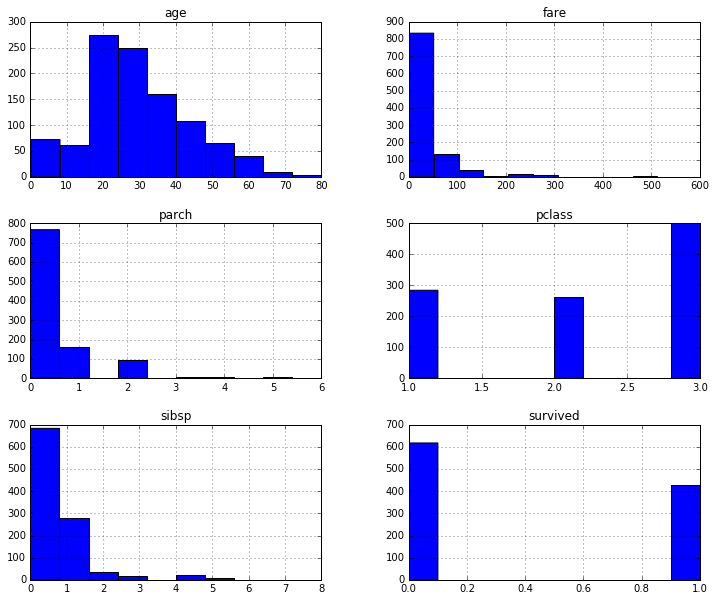

In [27]:
# aquí vemos las estadisticas de los valores de cada columna, es decir como se reparten los valores en cada una de las 
# columnas. Si hay más valores de un tipo o de otro.

%matplotlib inline 
titanic.hist(figsize=(12,10)) 

In [ ]:
# vemos que:

# Había de todas las edades aunque la mayoria eran jovenes entre 20 y 40 años

# los datos del precio del billete no creo que esten mmuy bien ya que tenemos numerosos billetes gratis (=0), varios sin 
# precio (en blanco) y uno que parece que ha pagado por todos los demás (los Cardeza han pagado ellos solitos más de un
# millon) y salvo que se hayan dedicado a invitar a todos sus amigo y conocidos, pero muchos, a subirse al titanic ( lo cual explicaria
# tantos asajeros con billete que cuesta 0) tiene que ser un error por lo que dejaremos de utilizar esta variable.
# la entenderemos comprendida por la clase del billete.

# Vemos que habia casi más gente en 3ª clase que en primera y segunda juntas

# Vemos que la mayoria viajaban solos, por los graficos parch y sibsp. Por ahora no sabemos is eso tendría inflluencia.

# Y finalmente que murio mucha más gente de la que sobrevivio.

# vamos a hacer graficos para relacionar estas variables con la de supervivencia para ver si estan directamennte relacionadas. 


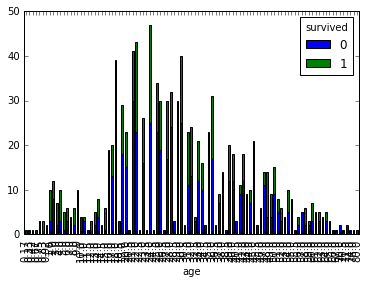

In [32]:
# Así pintamos la relacion entre edad y supervivencia

graf = pd.crosstab(titanic.age, titanic.survived)
graf.plot(kind='bar', stacked=True, color=['blue','green','red' ], grid=False)

In [ ]:
# Para una mejor visualización a discretizar, es decir, convertir una variable continua en una categorica.
# Es decir vamos a crear una función que en basee a ciertos valores nummericos se le asigna una caracteristica
# En este caso vamos a categorizar los ppasajeros en funcion de su edad: niños adultos y tercera edad

In [36]:
# Función para discretizar

def get_WoE(data, var, target):
   crosstab = pd.crosstab(data[target], data[var])
   print ("Obteniendo el Woe para la variable", var, ":")    
   for col in crosstab.columns:
       if crosstab[col][1] == 0:
           print ("  El WoE para", col, "[", sum(crosstab[col]), "] es infinito")
       else:
           print ("  El WoE para", col, "[", sum(crosstab[col]), "] es", np.log(float(crosstab[col][0]) / float(crosstab[col][1])))



In [37]:
titanic2 = titanic.loc[:, 'Age_Agregado'] = titanic['age'].map(lambda x: 'Niños' if x<12 else 'tercera edad' if x > 60 else 'adultos')
get_WoE(titanic, 'Age_Agregado', 'survived') 

Obteniendo el Woe para la variable Age_Agregado :
  El WoE para Niños [ 91 ] es -0.24294617861
  El WoE para adultos [ 922 ] es 0.409081748578
  El WoE para tercera edad [ 32 ] es 1.09861228867


In [39]:
# vemos como nos ha quedado el data frame con la nueva columna clasificada en base a edades

titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,Age_Agregado
0,1,1,female,29.00,0,0,211.3375,adultos
1,1,1,male,0.92,1,2,151.5500,Niños
2,1,0,female,2.00,1,2,151.5500,Niños
3,1,0,male,30.00,1,2,151.5500,adultos
4,1,0,female,25.00,1,2,151.5500,adultos


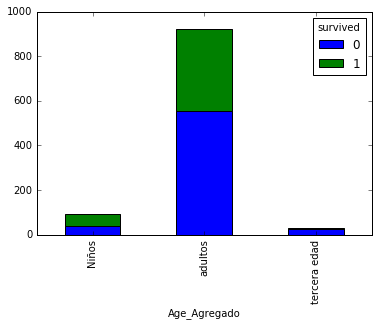

In [40]:
# Ahora pintamos de nuevo la relacion entre edad, bueno la edad categorizada, y supervivencia

graf = pd.crosstab(titanic.Age_Agregado, titanic.survived)
graf.plot(kind='bar', stacked=True, color=['blue','green','red' ], grid=False)

In [ ]:
# asi vemos que en proporcion sobrevivieron más niños que adultos.
# Tambien vemos que de tercera edad todos murieron

# por ello deducimos que la edad tiene influencia en el resultado final. Lo anotamos

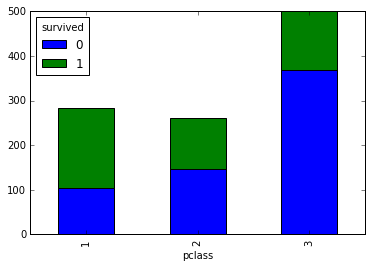

In [41]:
# Miramos ahora la relacion entre clase del pasaje y supervivencia

graf = pd.crosstab(titanic.pclass, titanic.survived)
graf.plot(kind='bar', stacked=True, color=['blue','green','red' ], grid=False)

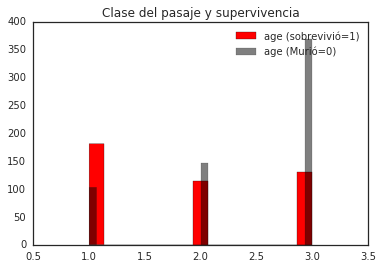

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(titanic['pclass'][titanic['survived'] == 1], bins=15, histtype='bar', color='red', label='age (sobrevivió=1)') 
plt.hist(titanic['pclass'][titanic['survived'] == 0], bins=30, histtype='bar', color='black', label='age (Murió=0)', alpha=0.5)
plt.title('Clase del pasaje y supervivencia')
plt.legend()
plt.show()

In [ ]:
# Aquí nuevamente vemos una clara relación en cuanto cuanto mejor era la clase del pasaje mayor posibilidades de supervvivencia
# en Primera sobrevivieron más de os que murieron
# en segunda murieron unos pocos más de los que sobrevivieron
# en tercera...

# it´s good to be rich !!!

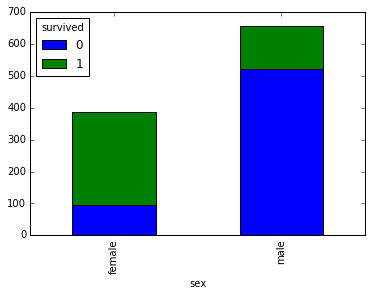

In [42]:
# Le toca el turno a la relacion entre el sexo del pasajaro y supervivencia

graf = pd.crosstab(titanic.sex, titanic.survived)
graf.plot(kind='bar', stacked=True, color=['blue','green','red' ], grid=False)

In [ ]:
# aquí esta claro que los hombres llevamos las de perder....

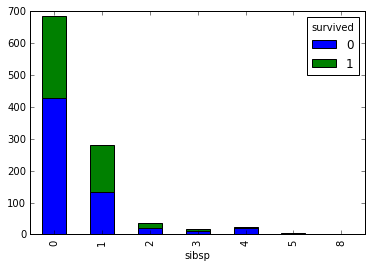

In [43]:
# Y ahora la relacion entre cuantos hermanos o conyuje tiene en el barco  y supervivencia

graf = pd.crosstab(titanic.sibsp, titanic.survived)
graf.plot(kind='bar', stacked=True, color=['blue','green','red' ], grid=False)

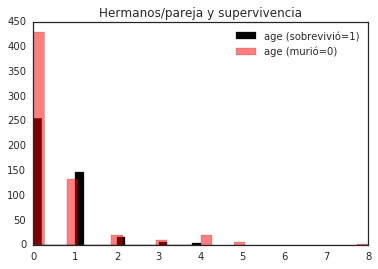

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(titanic['sibsp'][titanic['survived'] == 1], bins=20, histtype='bar', color='black', label='age (sobrevivió=1)') 
plt.hist(titanic['sibsp'][titanic['survived'] == 0], bins=30, histtype='bar', color='red', label='age (murió=0)', alpha=0.5)
plt.title('Hermanos/pareja y supervivencia')
plt.legend()
plt.show()

In [ ]:
# parece que hay una ligera relacion:
# si ibas en pareja o con 1 o 2 hermanos tenias más posibilidad de sobrevivir que si ibas solo

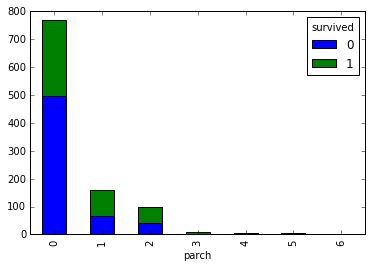

In [44]:
# Así pintamos la relacion entre cuantos niños o padres tiene en el barco  y supervivencia

graf = pd.crosstab(titanic.parch, titanic.survived)
graf.plot(kind='bar', stacked=True, color=['blue','green','red' ], grid=False)

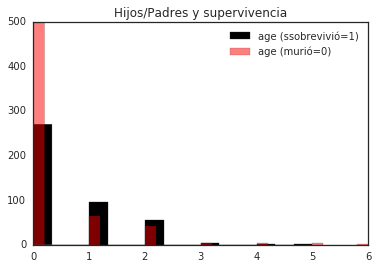

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(titanic['parch'][titanic['survived'] == 1], bins=15, histtype='bar', color='black', label='age (ssobrevivió=1)') 
plt.hist(titanic['parch'][titanic['survived'] == 0], bins=30, histtype='bar', color='red', label='age (murió=0)', alpha=0.5)
plt.title('Hijos/Padres y supervivencia')
plt.legend()
plt.show()

In [58]:
# parece que hay una relacion:
# si tenias 1 o 2 niños o padre en el titanic tenias más posibilidad de sobrevivir que si ibas solo

In [ ]:
# Por eso las variables que vamos a tomar son:
# Edad
# Sexo
# Clase del billete
# Si tiene parientes
# Si tiene niños/padre

In [104]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,Age_Agregado
0,1,1,female,29.00,0,0,211.3375,adultos
1,1,1,male,0.92,1,2,151.5500,Niños
2,1,0,female,2.00,1,2,151.5500,Niños
3,1,0,male,30.00,1,2,151.5500,adultos
4,1,0,female,25.00,1,2,151.5500,adultos


In [105]:
# Eliminamos fare por los motivos anteriormente explicados

del titanic['fare']

In [106]:
# nos queda:

titanic.head()

,pclass,survived,sex,age,sibsp,parch,Age_Agregado
0,1,1,female,29.00,0,0,adultos
1,1,1,male,0.92,1,2,Niños
2,1,0,female,2.00,1,2,Niños
3,1,0,male,30.00,1,2,adultos
4,1,0,female,25.00,1,2,adultos


In [107]:
# vamos a hacer una copia del data frame para trabajar con el nuevo
titanic_2 = titanic

In [108]:
titanic_2.head()

,pclass,survived,sex,age,sibsp,parch,Age_Agregado
0,1,1,female,29.00,0,0,adultos
1,1,1,male,0.92,1,2,Niños
2,1,0,female,2.00,1,2,Niños
3,1,0,male,30.00,1,2,adultos
4,1,0,female,25.00,1,2,adultos


In [112]:
# eliminamos variable continua de edad, y utilizaremos la de la edad agregadoo
del titanic['age']

In [117]:
titanic.head()

,pclass,survived,sex,sibsp,parch,Age_Agregado
0,1,1,female,0,0,adultos
1,1,1,male,1,2,Niños
2,1,0,female,1,2,Niños
3,1,0,male,1,2,adultos
4,1,0,female,1,2,adultos


In [ ]:
# Ahora solo tenemos variables categóricas

In [115]:
#separo en una variable las variables explicativas 

var_explicativas = titanic[['pclass','sex','Age_Agregado','sibsp','parch']]
modelo_titanic = titanic[['survived','pclass','sex','Age_Agregado','sibsp','parch']].copy()
modelo_titanic.head()

,survived,pclass,sex,Age_Agregado,sibsp,parch
0,1,1,female,adultos,0,0
1,1,1,male,Niños,1,2
2,0,1,female,Niños,1,2
3,0,1,male,adultos,1,2
4,0,1,female,adultos,1,2


In [116]:
# separamos las variables categóticas en binarias.

for var in var_explicativas:
    dummie = pd.get_dummies(modelo_titanic[var], prefix = var)
    names = list(dummie.columns)
    names.remove(names[0])
    modelo_titanic = pd.concat([modelo_titanic, dummie[names]], axis = 1)
    names = list(modelo_titanic.columns)
    names.remove(var)
    modelo_titanic = modelo_titanic[names]
    
modelo_titanic.head(5)

,survived,pclass_2,pclass_3,sex_male,Age_Agregado_adultos,Age_Agregado_tercera edad,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6
0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [119]:
# vamos a aplicar un análisis de colinealidad, es decir ver si alguna de las variables que hemmos seleccionados estan
# relacionadas entre sí de una formma lineal (es que podemos explicar dos variables de nuestro modello entre si con una función)

from sklearn.linear_model import LinearRegression


titanic_vif = modelo_titanic.copy(deep = True)
features = list(titanic_vif.columns)
features.remove('survived')
titanic_vif = titanic_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = titanic_vif[fet]
    y = modelo_titanic[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)



El valor del VIF para la variable pclass_2 es: 1.48986376229
El valor del VIF para la variable pclass_3 es: 1.65193662645
El valor del VIF para la variable sex_male es: 1.1095663722
El valor del VIF para la variable Age_Agregado_adultos es: 2.09878971724
El valor del VIF para la variable Age_Agregado_tercera edad es: 1.63966949488
El valor del VIF para la variable sibsp_1 es: 1.22034967418
El valor del VIF para la variable sibsp_2 es: 1.04358754075
El valor del VIF para la variable sibsp_3 es: 1.09465818085
El valor del VIF para la variable sibsp_4 es: 1.2485123175
El valor del VIF para la variable sibsp_5 es: 1.100277654
El valor del VIF para la variable sibsp_8 es: 1.01805730819
El valor del VIF para la variable parch_1 es: 1.38788063794
El valor del VIF para la variable parch_2 es: 1.46261243049
El valor del VIF para la variable parch_3 es: 1.02337709477
El valor del VIF para la variable parch_4 es: 1.01981058668
El valor del VIF para la variable parch_5 es: 1.02218343214
El valor d

In [ ]:
# como ninguna es mayor de 5, pues no hay variable colieales

In [ ]:
# Ahora vamoss a hacer la comprobación de cual/cuanto es el valor explicativo de las variables. Es decir como de directa
# es la fuerza de la relación con la variable objetivo (vamos que si influye mucho el resultado o no)

In [124]:
var_categoricas = ['pclass_2','pclass_3','sex_male','Age_Agregado_adultos','Age_Agregado_tercera edad','sibsp_1','sibsp_2','sibsp_3','sibsp_4','sibsp_5','sibsp_8','parch_1','parch_2','parch_3','parch_4','parch_5','parch_6']
var_target      = modelo_titanic['survived']

In [125]:
from sklearn.linear_model.logistic import LogisticRegression

result_IV = []

for v_cat in var_categoricas:
    var_target = array(var_target)
    var_values = array(modelo_titanic[v_cat])
    var_levels = unique(var_values)

    mat_values = numpy.zeros(shape=(len(var_levels),2))

    for i in range(len(var_target)):
        
        # Obtención de la posición en los niveles del valor
        for j in range(len(var_levels)):
            if var_levels[j] == var_values[i]:
                pos = j
                break

        # Estimación del número valores en cada nivel
        if var_target[i]:
            mat_values[pos][0] += 1
        else:
            mat_values[pos][1] += 1

        # Obtención del IV
        IV = 0
        for j in range(len(var_levels)):
            if mat_values[j][0] > 0 and mat_values[j][1] > 0:
                rt = mat_values[j][0] / (mat_values[j][0] + mat_values[j][1])
                rf = mat_values[j][1] / (mat_values[j][0] + mat_values[j][1])
                IV += (rt - rf) * np.log(rt / rf)
        
    # Se agrega el IV al listado
    
    result_IV.append(IV)

for i in range(len(var_categoricas)):
    print ("La variable", var_categoricas[i], "el IV es", result_IV[i])

La variable pclass_2 el IV es 0.112833168159
La variable pclass_3 el IV es 0.507856484462
La variable sex_male el IV es 1.35855179749
La variable Age_Agregado_adultos el IV es 0.0858329862781
La variable Age_Agregado_tercera edad el IV es 0.609598809588
La variable sibsp_1 el IV es 0.152218099715
La variable sibsp_2 el IV es 0.0942927763658
La variable sibsp_3 el IV es 0.194499761655
La variable sibsp_4 el IV es 1.4015273536
La variable sibsp_5 el IV es 0.0640908852911
La variable sibsp_8 el IV es 0.0669886513684
La variable parch_1 el IV es 0.198565931421
La variable parch_2 el IV es 0.130224461705
La variable parch_3 el IV es 0.197800014502
La variable parch_4 el IV es 0.897857818011
La variable parch_5 el IV es 1.13845820912
La variable parch_6 el IV es 0.0664060379747


In [ ]:
# aquí tenemos que descartar las que sean menor de 0,5 así nos quedamos con:
# si viaja en 3ª - pclass_3
# si es hombre - sex_male
# si es de la tercera edad - Age_Agregado_tercera edad
# si tiene cuatros hermano o conyuge - sibsp_4
# si tiene cuatro hijos o padres - parch_4
# si tiene cinco hijos o padres - parch_5

In [126]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

# Creación de modelos basados en variables binarias

var_categoricas = ['pclass', 'sex', 'Age_Agregado', 'sibsp', 'parch']
var_numericas   = []
var_target      = titanic['survived'] 

for v_cat in var_categoricas:
    dum_var    = pd.get_dummies(titanic[v_cat])
    features   = list(dum_var.columns)
    features.remove(features[1])
    classifier = LogisticRegression().fit(dum_var, var_target)
    y_pred     = classifier.predict(dum_var)
    
    print (v_cat)
    print ('Precisión:', accuracy_score(y_pred, var_target))
    print ('Exactitud:', precision_score(y_pred, var_target))
    print ('Exhaustividad:', recall_score(y_pred, var_target))

pclass
Precisión: 0.666028708134
Exactitud: 0.423887587822
Exhaustividad: 0.637323943662
sex
Precisión: 0.778947368421
Exactitud: 0.683840749415
Exhaustividad: 0.752577319588
Age_Agregado
Precisión: 0.601913875598
Exactitud: 0.11943793911
Exhaustividad: 0.56043956044
sibsp
Precisión: 0.604784688995
Exactitud: 0.344262295082
Exhaustividad: 0.525
parch
Precisión: 0.634449760766
Exactitud: 0.36299765808
Exhaustividad: 0.584905660377


In [127]:
modelo_titanic_def = modelo_titanic[['survived','sex_male','pclass_3','Age_Agregado_tercera edad','sibsp_4','parch_4','parch_5']]
modelo_titanic_def.head()

,survived,sex_male,pclass_3,Age_Agregado_tercera edad,sibsp_4,parch_4,parch_5
0,1,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# estas son las variables con suficiente fuerza de relacion con la variable del objetivo

In [129]:
# ahora llevamos al modelo al gimansio a entrenar  :o)

# Se separa la población en dos muestras, una para entrenamiento y otra para test

from sklearn.cross_validation import train_test_split
var_categoricas=['sex_male','pclass_3','Age_Agregado_tercera edad','sibsp_4','parch_4','parch_5']
# Obtenemos las muestras de entrenamiento (80%) y test (20%)
x = modelo_titanic_def[var_categoricas]
y = modelo_titanic_def['survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [130]:
from sklearn.linear_model.logistic import LogisticRegression

# Primero creamos el modelo

rlog = LogisticRegression() 

# A continuación entrenaremos el modelo

classifier = rlog.fit(x_train, y_train) 

# y obtenemos unas predicciones con la muestra de entrenamiento y con la de test

y_predic_train = classifier.predict(x_train) 
y_predic_test = classifier.predict(x_test)

In [131]:
# Ahora testeamos la precisión del modelo en ambas muestras

train = (y_predic_train == y_train).sum().astype(float) / y_train.shape[0]
print("Accurate train: {0:.2f}".format(train))
test = (y_predic_test == y_test).sum().astype(float) / y_test.shape[0]
print("Accurate test: {0:.2f}".format(test))

# y vemos resultados

Accurate train: 0.78
Accurate test: 0.79


In [132]:
# no empeora en test, lo cual significa que el modelo no esta sobre entrenado y es correcto

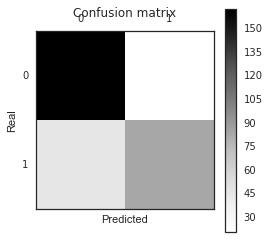

In [133]:
# por ultimo comprobamos la idoneidad del modelo con la matriz de confusión

cm = confusion_matrix(y_test, y_predic_test)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# el resultado es que la mayor parte de las observaciones coinciden con las previsiones del modelo. Así por ejemplo:
# vemos que hay pocas observaciones en las que el modelo ha dicho que sobrevive y en realidad ha muerto (cuadro arriba a la
# derecha)
# y por contrario hay muchos casos en los que el modelo ha dicho que muere y efectivamente ha muerto (cuadro arriba a la
# izquierda)